# Kỹ Thuật Imputation Trên Bộ Dữ Liệu Titanic
Notebook này trình bày toàn bộ các bước xử lý giá trị thiếu (missing values).

##  1. Import thư viện cần thiết

### Cài thư viện
- pip install pandas
- pip install numpy
- pip install scikit-learn
- pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


##  2. Tải bộ dữ liệu Titanic

In [2]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##  3. Kiểm tra giá trị thiếu

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 4. Imputation đơn biến (Univariate)

In [5]:
median_imp = SimpleImputer(strategy='median')
df['Age_median'] = median_imp.fit_transform(df[['Age']])

mean_imp = SimpleImputer(strategy='mean')
df['Age_mean'] = mean_imp.fit_transform(df[['Age']])

mode_imp = SimpleImputer(strategy='most_frequent')
df['Age_mode'] = mode_imp.fit_transform(df[['Age']])
df['Embarked_mode'] = mode_imp.fit_transform(df[['Embarked']]).ravel()

const_imp = SimpleImputer(strategy='constant', fill_value='Unknown')
df['Cabin_constant'] = const_imp.fit_transform(df[['Cabin']]).ravel()

print("\n=== Age median===")
display(df[['Age', 'Age_median']][df['Age'].isna()].head(10))

print("\n=== Age mean===")
display(df[['Age', 'Age_mean']][df['Age'].isna()].head(10))

print("\n=== Age mode===")
display(df[['Age', 'Age_mode']][df['Age'].isna()].head(10))

print("\n=== Embarked ===")
display(df[['Embarked', 'Embarked_mode']][df['Embarked'].isna()].head(10))

print("\n=== Cabin ===")
display(df[['Cabin', 'Cabin_constant']][df['Cabin'].isna()].head(10))


=== Age median===


,Age,Age_median
5,NaN,28.0
17,NaN,28.0
19,NaN,28.0
26,NaN,28.0
28,NaN,28.0
29,NaN,28.0
31,NaN,28.0
32,NaN,28.0
36,NaN,28.0
42,NaN,28.0



=== Age mean===


,Age,Age_mean
5,NaN,29.699118
17,NaN,29.699118
19,NaN,29.699118
26,NaN,29.699118
28,NaN,29.699118
29,NaN,29.699118
31,NaN,29.699118
32,NaN,29.699118
36,NaN,29.699118
42,NaN,29.699118



=== Age mode===


,Age,Age_mode
5,NaN,24.0
17,NaN,24.0
19,NaN,24.0
26,NaN,24.0
28,NaN,24.0
29,NaN,24.0
31,NaN,24.0
32,NaN,24.0
36,NaN,24.0
42,NaN,24.0



=== Embarked ===


,Embarked,Embarked_mode
61,NaN,S
829,NaN,S



=== Cabin ===


,Cabin,Cabin_constant
0,NaN,Unknown
2,NaN,Unknown
4,NaN,Unknown
5,NaN,Unknown
7,NaN,Unknown
8,NaN,Unknown
9,NaN,Unknown
12,NaN,Unknown
13,NaN,Unknown
14,NaN,Unknown


### So sánh phân phối Age trước và sau Median Imputation

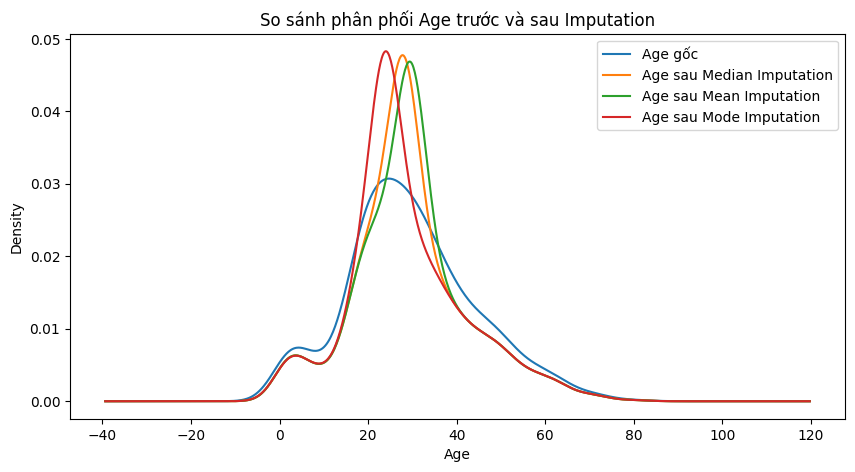

Điểm đánh giá (Càng thấp càng tốt): 
Median: 0.0979354704844901
Mean: 0.10683869507398919
Mode: 0.12158466080034708


In [6]:
plt.figure(figsize=(10,5))

df['Age'].plot(kind='kde', label='Age gốc')
df['Age_median'].plot(kind='kde', label='Age sau Median Imputation')
df['Age_mean'].plot(kind='kde', label='Age sau Mean Imputation')
df['Age_mode'].plot(kind='kde', label='Age sau Mode Imputation')

plt.legend()
plt.title('So sánh phân phối Age trước và sau Imputation')
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


from scipy.stats import ks_2samp

print("Điểm đánh giá (Càng thấp càng tốt): ")
print("Median:", ks_2samp(df['Age'].dropna(), df['Age_median']).statistic)
print("Mean:", ks_2samp(df['Age'].dropna(), df['Age_mean']).statistic)
print("Mode:", ks_2samp(df['Age'].dropna(), df['Age_mode']).statistic)

### Mã hoá các dữ liệu cần thiết

In [7]:
df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1})

df_filtered = df[['PassengerId','Survived','Age','Sex','Sex_encoded','Name']]

df_filtered.head(20)


,PassengerId,Survived,Age,Sex,Sex_encoded,Name
0,1,0,22.0,male,0,"Braund, Mr. Owen Harris"
1,2,1,38.0,female,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,26.0,female,1,"Heikkinen, Miss. Laina"
3,4,1,35.0,female,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,35.0,male,0,"Allen, Mr. William Henry"
5,6,0,NaN,male,0,"Moran, Mr. James"
6,7,0,54.0,male,0,"McCarthy, Mr. Timothy J"
7,8,0,2.0,male,0,"Palsson, Master. Gosta Leonard"
8,9,1,27.0,female,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,10,1,14.0,female,1,"Nasser, Mrs. Nicholas (Adele Achem)"


## 5. Imputation đa biến — Regression


=== Age ===


,PassengerId,Survived,Age,Age_reg,Sex_encoded,Name
5,6,0,NaN,28.285214,0,"Moran, Mr. James"
17,18,1,NaN,35.215212,0,"Williams, Mr. Charles Eugene"
19,20,1,NaN,25.064720,1,"Masselmani, Mrs. Fatima"
26,27,0,NaN,28.307314,0,"Emir, Mr. Farred Chehab"
28,29,1,NaN,25.052997,1,"O'Dwyer, Miss. Ellen ""Nellie"""
29,30,0,NaN,28.295294,0,"Todoroff, Mr. Lalio"
31,32,1,NaN,32.788294,1,"Spencer, Mrs. William Augustus (Marie Eugenie)"
32,33,1,NaN,25.055312,1,"Glynn, Miss. Mary Agatha"
36,37,1,NaN,28.307239,0,"Mamee, Mr. Hanna"
42,43,0,NaN,28.295294,0,"Kraeff, Mr. Theodor"


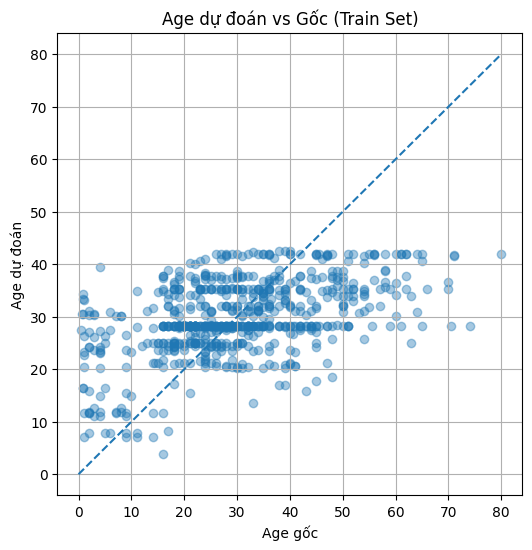

In [8]:

df_reg = df.copy()

train_df = df_reg[df_reg['Age'].notna()]

test_df  = df_reg[df_reg['Age'].isna()]

X_train = train_df[['Fare','Pclass','Sex_encoded','SibSp','Parch']]
y_train = train_df['Age']

X_test  = test_df[['Fare','Pclass','Sex_encoded','SibSp','Parch']]

reg = LinearRegression()
reg.fit(X_train, y_train)

df_reg.loc[df_reg['Age'].isna(), 'Age_reg'] = reg.predict(X_test)

print("\n=== Age ===")
df_reg_showcase = df_reg[df['Age'].isna()][[
    'PassengerId','Survived','Age','Age_reg','Sex_encoded','Name'
]]

display(df_reg_showcase.head(15))

y_pred_train = reg.predict(X_train)

plt.figure(figsize=(6,6))
plt.scatter(y_train, y_pred_train, alpha=0.4)
plt.xlabel("Age gốc")
plt.ylabel("Age dự đoán")
plt.title("Age dự đoán vs Gốc (Train Set)")
plt.plot([0,80], [0,80], '--')
plt.grid(True)
plt.show()

## 6. Imputation đa biến — KNN

In [9]:
missing_age_idx = df[df['Age'].isna()].index[0]
example_row = df.loc[missing_age_idx]
print('Chọn hàng ví dụ (index):', missing_age_idx)
display(example_row.to_frame().T)

Chọn hàng ví dụ (index): 5


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_mean,Age_mode,Embarked_mode,Cabin_constant,Sex_encoded
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0,29.699118,24.0,Q,Unknown,0


##### Chuẩn hoá ( Z-score )

In [10]:

features = ['Age','Fare','Pclass','Sex_encoded','SibSp','Parch']
X = df[features].copy()
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features, index=df.index)
display(X_scaled.head())

,Age,Fare,Pclass,Sex_encoded,SibSp,Parch
0,-0.530377,-0.502445,0.827377,-0.737695,0.432793,-0.473674
1,0.571831,0.786845,-1.566107,1.355574,0.432793,-0.473674
2,-0.254825,-0.488854,0.827377,1.355574,-0.474545,-0.473674
3,0.365167,0.420730,-1.566107,1.355574,0.432793,-0.473674
4,0.365167,-0.486337,0.827377,-0.737695,-0.474545,-0.473674


##### Tính khoảng cách

In [11]:
example_scaled = X_scaled.loc[missing_age_idx]
others = X_scaled.drop(index=missing_age_idx)
mask_has_age = df['Age'].notna()
others_with_age = others[mask_has_age.drop(missing_age_idx, errors='ignore')]

dists = np.sqrt(((others_with_age - example_scaled) ** 2).sum(axis=1))
dists = dists.sort_values()
display(dists.head(15))

652    0.000503
769    0.001929
834    0.003187
103    0.003944
725    0.004112
285    0.004112
821    0.004112
836    0.004112
500    0.004112
349    0.004112
844    0.004112
471    0.004112
163    0.004112
67     0.006040
401    0.008221
dtype: float64

##### Chọn 5 hàng xóm gần nhất để dự đoán

In [12]:
k = 5
nn_idx = dists.index[:k]
print('5 hàng xóm gần nhất (index):', list(nn_idx))
display(df.loc[nn_idx, ['Age','Fare','Pclass','Sex_encoded','SibSp','Parch']])
imputed_age_knn_manual = df.loc[nn_idx, 'Age'].mean()
print(f'Giá trị Age ước lượng bằng KNN (mean of {k} NN): {imputed_age_knn_manual:.3f}')

5 hàng xóm gần nhất (index): [652, 769, 834, 103, 725]


,Age,Fare,Pclass,Sex_encoded,SibSp,Parch
652,21.0,8.4333,3,0,0,0
769,32.0,8.3625,3,0,0,0
834,18.0,8.3000,3,0,0,0
103,33.0,8.6542,3,0,0,0
725,20.0,8.6625,3,0,0,0


Giá trị Age ước lượng bằng KNN (mean of 5 NN): 24.800


In [13]:
from sklearn.metrics import pairwise_distances
import numpy as np

selected_cols = ['Age','Fare','Pclass','Sex_encoded','SibSp','Parch']
df_selected = df[selected_cols]

knn_full = KNNImputer(n_neighbors=5)
df_knn_full = knn_full.fit_transform(df_selected)

df_knn_df = pd.DataFrame(df_knn_full, columns=[col + "_knn" for col in df_selected.columns])
df_knn_compare = pd.concat([df, df_knn_df], axis=1)

dist_matrix = pairwise_distances(df_selected.fillna(df_selected.mean()))

missing_age_idx = df[df['Age'].isna()].index.tolist()

neighbor_ids = []
neighbor_distances = []

for idx in missing_age_idx:
    distances = dist_matrix[idx]
    nearest_idx = np.argsort(distances)[1:6]
    neighbor_ids.append(list(df.iloc[nearest_idx]["PassengerId"].values))
    neighbor_distances.append(list(np.round(distances[nearest_idx], 5)))

df_knn_showcase = df_knn_compare.loc[missing_age_idx, [
    'PassengerId','Survived','Age','Age_knn','Sex_encoded','Name'
]]

df_knn_showcase["KNN_neighbors"] = neighbor_ids
df_knn_showcase["KNN_distances"] = neighbor_distances

print("\n=== Age ===")
display(df_knn_showcase.head(15))



=== Age ===


,PassengerId,Survived,Age,Age_knn,Sex_encoded,Name,KNN_neighbors,KNN_distances
5,6,0,NaN,24.200,0,"Moran, Mr. James","[159, 585, 445, 78, 96]","[0.2042, 0.2542, 0.3458, 0.4083, 0.4083]"
17,18,1,NaN,32.200,0,"Williams, Mr. Charles Eugene","[179, 419, 214, 548, 748]","[0.30088, 0.30088, 0.30088, 0.8625, 1.04428]"
19,20,1,NaN,18.200,1,"Masselmani, Mrs. Fatima","[368, 236, 503, 698, 728]","[0.0042, 0.325, 0.4042, 0.5083, 0.5125]"
26,27,0,NaN,32.500,0,"Emir, Mr. Farred Chehab","[27, 599, 774, 523, 833]","[0.0, 0.0, 0.0, 0.0, 0.0042]"
28,29,1,NaN,23.600,1,"O'Dwyer, Miss. Ellen ""Nellie""","[359, 360, 654, 83, 275]","[0.0, 0.0, 0.05, 0.0917, 0.1292]"
29,30,0,NaN,26.200,0,"Todoroff, Mr. Lalio","[411, 30, 740, 224, 385]","[0.0, 0.0, 0.0, 0.0, 0.0]"
31,32,1,NaN,21.584,1,"Spencer, Mrs. William Augustus (Marie Eugenie)","[499, 709, 333, 270, 610]","[7.1676, 9.25037, 10.95864, 12.1506, 12.46176]"
32,33,1,NaN,26.900,1,"Glynn, Miss. Mary Agatha","[33, 265, 301, 369, 48]","[0.0, 0.0, 0.0, 0.0, 0.0]"
36,37,1,NaN,24.800,0,"Mamee, Mr. Hanna","[37, 569, 532, 525, 860]","[0.0, 0.0, 0.0, 0.0, 0.0]"
42,43,0,NaN,26.200,0,"Kraeff, Mr. Theodor","[411, 30, 740, 224, 385]","[0.0, 0.0, 0.0, 0.0, 0.0]"


Ở bên trên, KNN_distances có 5 giá trị, tương ứng với khoảng cách từ hàng có giá trị missing đến hàng xóm của nó

##  7. Imputation đa biến — MICE

In [14]:
mice = IterativeImputer(max_iter=20, random_state=0)
df_mice_full = mice.fit_transform(df_selected)

df_mice_df = pd.DataFrame(df_mice_full, columns=[col + "_mice" for col in df_selected.columns])

df_mice_compare = pd.concat([df, df_mice_df], axis=1)

print("\n=== Age ===")
df_mice_showcase = df_mice_compare[df[['Age']].isna().any(axis=1)][['PassengerId','Survived','Age','Age_mice','Sex_encoded','Name']]

display(df_mice_showcase.head(15))



=== Age ===


,PassengerId,Survived,Age,Age_mice,Sex_encoded,Name
5,6,0,NaN,28.328785,0,"Moran, Mr. James"
17,18,1,NaN,35.033715,0,"Williams, Mr. Charles Eugene"
19,20,1,NaN,25.356480,1,"Masselmani, Mrs. Fatima"
26,27,0,NaN,28.348767,0,"Emir, Mr. Farred Chehab"
28,29,1,NaN,25.345881,1,"O'Dwyer, Miss. Ellen ""Nellie"""
29,30,0,NaN,28.337899,0,"Todoroff, Mr. Lalio"
31,32,1,NaN,32.904047,1,"Spencer, Mrs. William Augustus (Marie Eugenie)"
32,33,1,NaN,25.347974,1,"Glynn, Miss. Mary Agatha"
36,37,1,NaN,28.348699,0,"Mamee, Mr. Hanna"
42,43,0,NaN,28.337899,0,"Kraeff, Mr. Theodor"


##  8. So sánh trực quan các phương pháp Imputation

### So sánh phân phối Age: Mean vs KNN vs MICE

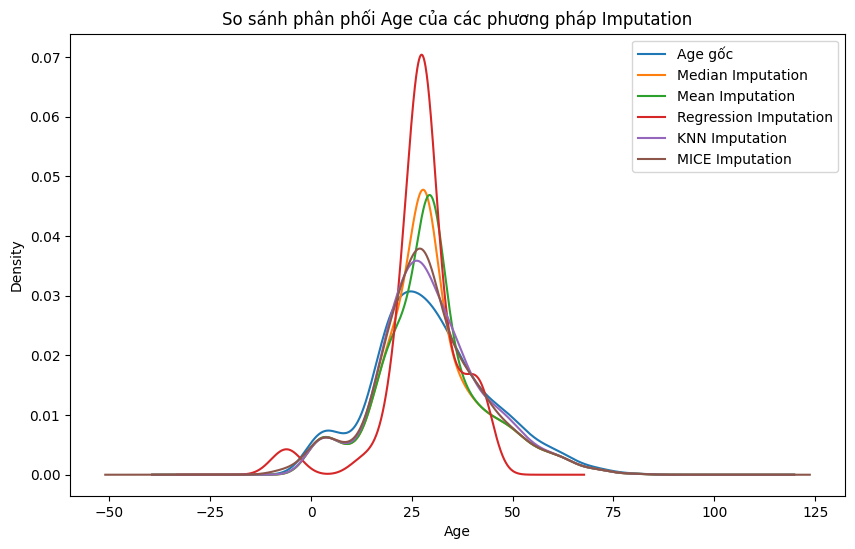

Điểm đánh giá (Càng thấp càng tốt):
Median: 0.0979354704844901
Mean: 0.10683869507398919
Regression: 0.26135878080045577
KNN: 0.046657046657046654
MICE: 0.05191975780211074


In [17]:

plt.figure(figsize=(10,6))
df["Age"].plot(kind="kde", label="Age gốc")
df["Age_median"].plot(kind="kde", label="Median Imputation")
df["Age_mean"].plot(kind="kde", label="Mean Imputation")
df_reg["Age_reg"].plot(kind="kde", label="Regression Imputation")
df_knn_df["Age_knn"].plot(kind="kde", label="KNN Imputation")
df_mice_df["Age_mice"].plot(kind="kde", label="MICE Imputation")
plt.title("So sánh phân phối Age của các phương pháp Imputation")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

original = df["Age"].dropna()

print("Điểm đánh giá (Càng thấp càng tốt):")
print("Median:", ks_2samp(original, df["Age_median"].dropna()).statistic)
print("Mean:", ks_2samp(original, df["Age_mean"].dropna()).statistic)
print("Regression:", ks_2samp(original, df_reg["Age_reg"].dropna()).statistic)
print("KNN:", ks_2samp(original, df_knn_df["Age_knn"].dropna()).statistic)
print("MICE:", ks_2samp(original, df_mice_df["Age_mice"].dropna()).statistic)